# 03. 정밀도와 재현율

<br>

# 1. 정밀도(Precision)와 재현율(Recall)

- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞출 평가 지표

<br>

## 1.1 정밀도(Precision)

$
\quad
정밀도 = {TP \over \left(FP + TP\right)}
$

- **예측을 Positive**로 한 대상 중 예측과 실제 값이 Positive로 일치한 데이터의 비율  
  
  
- 분모(FP + TP) : 예측을 Positive로 한 모든 데이터 건수
- 분자(TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수  
  
  
- Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표
- **양성 예측도**라고도 불림

<br>

## 1.2 재현율(Recall)

$
\quad
재현율 = {TP \over \left(FN + TP\right)}
$

- **실제 값이 Positive**인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율  
  
  
- 분모(FN + TP) : 실제 값이 Positive인 모든 데이터 건수
- 분자(TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수  
  
  
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림

<br>

## 1.3 업무 특성에 따른 중요한 평가 지표

- 정밀도와 재현율 지표 중 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있음

<br>

### 1.3.1 재현율(Recall)이 중요한 지표인 경우

- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우

**1) 암 판단 모델**

- 실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음성으로 잘못 판단 했을 경우  
$\rightarrow$ 오류의 대가가 생명을 앗아갈 정도로 심각함  
  
  
- 반면에 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우  
$\rightarrow$ 다시 한번 재검사를 하는 수준의 비용이 소모될 것

**2) 금융 사기 적발 모델(ex. 보험 사기)**

- 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되는 경우  
$\rightarrow$ 회사에 미치는 손해가 클 것  
  
  
- 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하는 경우  
$\rightarrow$ 다시 한번 금융 사기인지 재확인하는 절차를 가동

<br>

### 1.3.2 정밀도(Precision)이 중요한 지표인 경우

- 실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

**1) 스펨메일 여부 판단 모델**

- 실제 Positive인 스펨 메일을 Negative인 일반 메일로 분류하는 경우  
$\rightarrow$ 사용자가 불편함을 느끼는 정도  
  
  
- 실제 Negative인 일반 메일을 Positive인 스펨 메일로 분류하는 경우  
$\rightarrow$ 메일을 아예 받지 못하게 돼 업무에 차질이 생김

<br>

## 1.4 정밀도와 재현율의 관계

- 재현율과 정밀도 모두 **TP를 높이는 데** 동일하게 초점을 맞춤  
$\rightarrow$ **재현율**은 **FN(실제 Positive, 예측 Negative)를 낮추는 데** 초점을 맞춤  
$\rightarrow$ **정밀도**는 **FP(실제 Negative, 예측 Positive)를 낮추는 데** 초점을 맞춤  
  
  
- 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용됨  
  
  
- 가장 좋은 성능 평가 : 재현율과 정밀도 모두 높은 수치를 얻는 것
- 바람직하지 않은 경우 : 둘 중 하나의 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우

<br>

## 1.5 타이타닉 예제에 대한 정밀도와 재현율을 이용한 예측 성능 평가

`precision_score()`

- 사이킷런이 제공하는 정밀도 계산 API

`recall_score()`

- 사이킷런이 제공하는 재현율 계산 API

<br>

`get_clf_eval()` 함수

- confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def get_clf_eval(y_test, pred) :
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [2]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


$\rightarrow$ 정밀도(Precision)에 비해 재현율(Recall)이 낮게 나옴

<br>

# 2. 정밀도/재현율 트레이드오프

## 2.1 정밀도/재현율의 트레이드오프(Trade-off)

- 분류 업무 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 **결정 임곗값(Threshold)**을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표  
$\rightarrow$ 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움

<br>

## 2.2 결정 확률(예측 확률)

- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는 지를 계산을 해야 함  
$\rightarrow$ 개별 레이블별로 **결정 확률**을 구함  
  
  
- 예측 확률이 큰 레이블값으로 예측을 하게 된다.

<br>

## 2.3 `predict_proba()`

- 사이킷런의 개별 데이터별로 예측 확률을 반환하는 메서드
- 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능  

### 2.3.1 입력 파라미터

**1) 테스트 피처 데이터 세트** 
- `predict()` 메서드와 동일

### 2.3.2 반환 값

**1) 개별 클래스의 예측 확률**

- ndarray m x n (m : 입력 값의 레코드 수, n : 클래스 값 유형)
- ex) 입력 테스트 데이터 세트의 표본 개수 = 100개, 예측 클래스 값 유형 = 2개(이진 분류)  
$\rightarrow$ 반환 값 = 100 x 2 ndarray  
  
  
- 각 열은 개별 클래스의 예측 확률
- ex) 이진 분류
  - 첫 번째 컬럼 : 0 Negative의 확률
  - 두 번째 컬럼 : 1 Positive의 확률

<br>

## 2.4 타이타닉 생존자 데이터에 대해 `predict_proba()` 사용

In [7]:
import numpy as np

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('predict_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('predict_proba array에서 앞 3개만 샘플로 추출 : \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

predict_proba() 결과 Shape : (179, 2)
predict_proba array에서 앞 3개만 샘플로 추출 : 
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


$\rightarrow$ 두 개의 컬럼 중에서 더 큰 확률 값으로 `predict()` 메서드가 최종 예측을 함

<br>

## 2.5 `predict()`과 `predict_proba()`와의 관게

- `predict()` 메서드는 `predict_proba()` 메서드에 기반해 생성된 API
- `predict()`는 `predict_proba()` 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 컬럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API

<br>

## 2.6 분류 결정 임곗값의 조정

- 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.
- 이러한 로직을 구현하기 위해 사이킷런의 `Binarizer` 클래스를 이용

<br>

### 2.6.1 `Binarizer` 클래스

- `threshold` 변수를 특정 값으로 설정하고 `Binarizer` 클래스를 객체로 생성
- 생성된 `Binarizer` 객체의 `fit_transform()` 메서드를 이용해 넘파이 ndarray를 입력
- 입력된 ndarray의 값을  
$\rightarrow$ 지정된 `threshold`보다 같거나 작다 $\Rightarrow$ 0 값으로 반환  
$\rightarrow$ 지정된 `threshold`보다 크다 $\Rightarrow$ 1 값으로 반환

In [10]:
from sklearn.preprocessing import Binarizer

X = [[ 1,  -1,   2],
     [ 2,   0,   0],
     [ 0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


<br>

### 2.6.2 `Binarizer` 이용 사이킷런 `predict()`의 의사(pseudo) 코드 생성

`pred_proba` 변수  

- `LogisticRegression` 객체의 `predict_proba()` 메서드로 구한 각 클래스별 예측 확률값  
  
  
- 위 변수에 분류 결정 임계값(threshold)를 0.5로 지정한 `Binarizer` 클래스를 적용해 최종 예측값을 구함
- 이 최종 예측값에 대해 `get_clf_eval()` 함수를 적용해 평가 지표 출력

In [12]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값(분류 결정 임곗값)
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


$\rightarrow$ 이 의사 코드로 계산된 평가 지표는 `predict()`로 계산된 지표 값과 정확히 일치

<br>

### 2.6.3 분류 결정 임곗값 낮추기

- 임곗값을 0.4로 낮춰보기

In [13]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


$\Rightarrow$ 임곗값을 낮춤(0.5 $\rightarrow$ 0.4)  
$\Rightarrow$ 재현율 값이 올라감(0.7705 $\rightarrow$ 0.8197)  
$\Rightarrow$ 정밀도 값이 내려감(0.8246 $\rightarrow$ 0.7042)

<br>

### 2.6.4 분류 결정 임곗값 조정의 의미

- 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다.
- 확률을 0.5에서 0.4로 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지게 된다.

<div style='text-align: left; margin-left: 20px;'>
    <img src='./images/Ch03/03/img001.jpg' width='700px'/>
</div>

- Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다.
- 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문

<div style='text-align: left; margin-left: 20px;'>
    <img src='./images/Ch03/03/img002.jpg' width='700px'/>
</div>

- 임곗값을 0.5에서 0.4로 낮춤  
  
  
- TP가 47에서 50으로 증가
- FN이 14에서 11로 감소
- 이에 따라 재현율이 0.770에서 0.820으로 좋아짐  
  
  
- FP는 10에서 21로 증가
- 이에 따라 정밀도는 0.825에서 0.704로 나빠짐

<br>

### 2.6.5 다양한 분류 결정 임곗값

- 임곗값을 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표 조사  

In [16]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds :
        
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [17]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임곗값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임곗값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임곗값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


<div style='text-align: left; margin-left: 20px;'>
    <img src='./images/Ch03/03/img003.jpg' width='500px'/>
</div>

$\rightarrow$ 임곗값이 0.45인 경우 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 상승함  
$\rightarrow$ 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 생각하면 임곗값 0.45가 가장 적당해 보임

<br>

## 2.7 `precision_recall_curve()`

- 사이킷런에서 이와 유사한 `precision_recall_curve()` API 제공

### 2.7.1 입력 파라미터

- `y_true` : 실제 클래스값 배열 (배열 크기 = [데이터 건수])
- `probas_pred` : Positive 컬럼의 예측 확률 배열 (배열 크기 = [데이터 건수])

### 2.7.2 반환 값

- 정밀도 : 임곗값별 정밀도 값을 배열로 반환
- 재현율 : 임곗값별 재현율 값을 배열로 반환
- 일반적으로 0.11 ~ 0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율을 담은 넘파이 ndarray 반환

- 147개의 너무 많은 임곗값 데이터가 반환되므로 이 중 샘플로 10건만 추출
- 임곗값을 15단계로 추출해 좀 더 큰 값의 임곗값과 그 때의 정밀도와 재현율 값 같이 확인

In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape : ', thresholds.shape)

반환된 분류 결정 임곗값 배열의 Shape :  (147,)


In [19]:
# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임곗값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 :  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [20]:
# 15 Step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율 : ', np.round(recalls[thr_index], 3))

샘플 임곗값별 정밀도 :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임곗값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


$\rightarrow$ 임곗값이 증가할수록 정밀도 값은 동시에 높아지나, 재현율 값은 낮아짐

<br>

## 2.8 임곗값에 따른 정밀도와 재현율 시각화

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

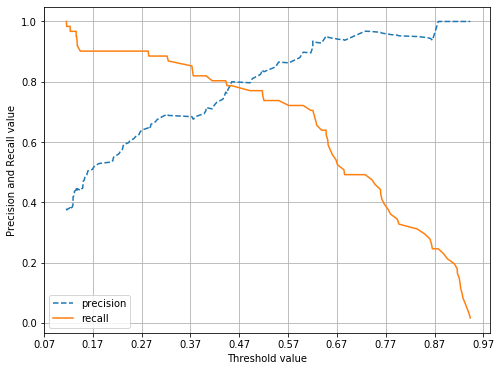

In [22]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

$\rightarrow$ 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐  
$\rightarrow$ 임곗값이 높을수록 재현율 값이 낮아지고 정밀도 값이 높아짐

<br>

# 3. 정밀도와 재현율의 맹점

- Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율 수치가 변경됨
- 임곗값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용
- 단수히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용해서는 안됨

<br>

## 3.1 정밀도가 100%가 되는 방법

- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측  
  
  
- 환자가 80세 이상이고 비만이며 이전에 암 진ㄷ난을 받았고 암 세포의 크기가 상위 0.1% 이상이다 $\rightarrow$ 무조건 Positive
- 다른 경우 $\rightarrow$ Negative로 예측  
  
  
- 정밀도 = TP / (TP + FP)
- 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명
- 이 한 명만 Positive로 예측 (나머지는 모두 Negative로 예측)  
$\rightarrow$ FP = 0, TP = 1  
$\Rightarrow$ 정밀도 = 1 / (1 + 0) = 1 (100%)

<br>

## 3.2 재현율이 100%가 되는 방법

- 모든 환자를 Positive로 예측  
  
  
- 재현율 = TP / (TP + FN)
- 전체 환자 1000명을 다 Positive로 예측  
$\rightarrow$ TP = 30 (실제 양성인 사람이 30명 정도)  
$\rightarrow$ TN은 재현율 계산 시 수치에 포함되지 않음  
$\rightarrow$ FN = 0 (Negative로 예측한 것이 없음)  
$\Rightarrow$ 재현율 = 30 / (30 + 0) = 1 (100%)